In [50]:
pip install TOF_SIMS

In [3]:
import TOF_SIMS as ts

In [4]:
aluminum_file_path = "E:/Filename_2019.04.11-09h51m35s.h5"
al = ts.TOF_SIMS(aluminum_file_path)

Cache size =  3
Opening Filename_2019.04.11-09h51m35s.h5
Extraction of sum_spectrum done
Extraction of event_list done removed for debugging, remember to put it back
Extraction of mass_axis done


# Quickly explore the dataset

## Visualise surface

Note that every figure generated can be saved using the <i><b>.savefig method</i></b>

Take a look at SEM image taken before FIBING using <i><b>plot_FIBimage</i></b>

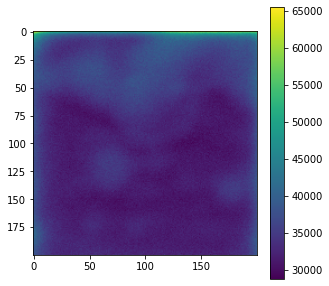

In [3]:
#note that the  .savefig method is facultative and is from matplotlib
al.plot_FIBImage(figsize = (5,5),cmap = "viridis")
#al.plot_FIBImage(figsize = (5,5)).savefig("figure1.png")

Let's look at all cross sections of sample at each z, all masses together:

Wall time: 0 ns
Subplot represent individual z with sub plots row = y-axis, sub plots column = x-axis projected over n-axis
Projection shape: (100, 100, 100)


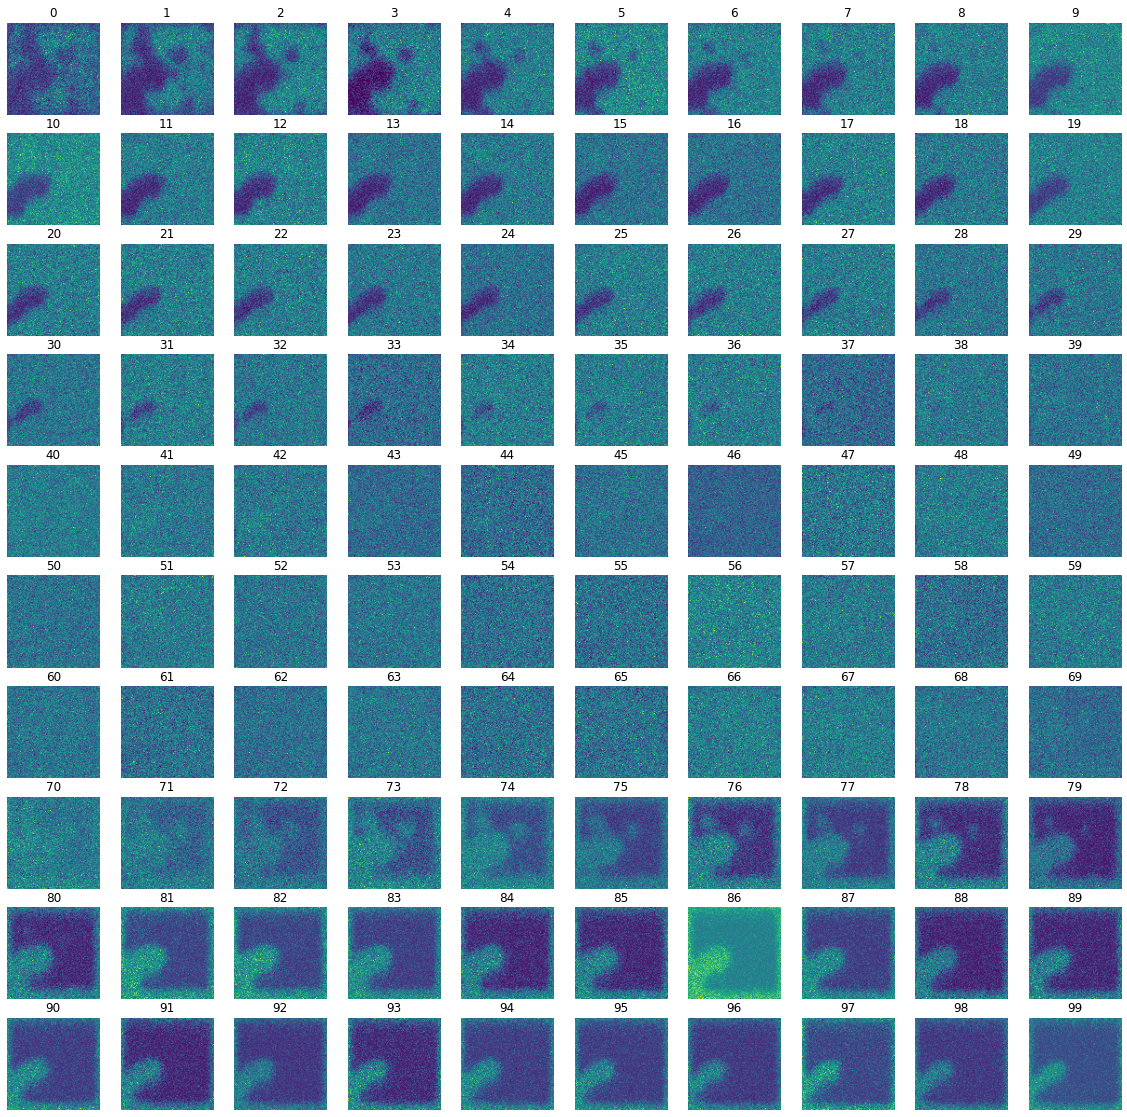

In [6]:
al.max_proj_peak_data(axes_displayed = "xy", axis_parsed = "z", axis_max_projection = "n", figsize = (20,20),cmap="viridis")

## Detected masses

Overview of the detected masses using <b>plot_sum_spectrum_vs_mass_axis</b> function.

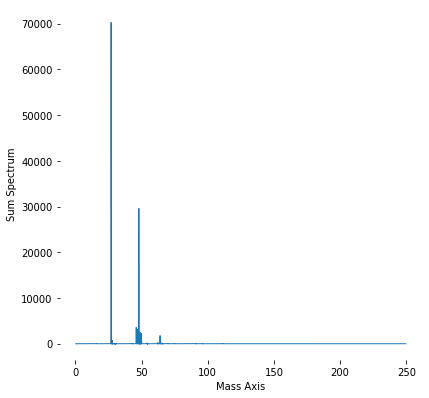

In [8]:
al.plot_sum_spectrum_vs_mass_axis()
#al.plot_sum_spectrum_vs_mass_axis().savefig("figure2.png")

Easily adjust min/max masses and sum of detected events (Sumspectrum)

Zoom in on regions(masses) of interest by passing it as argument to function

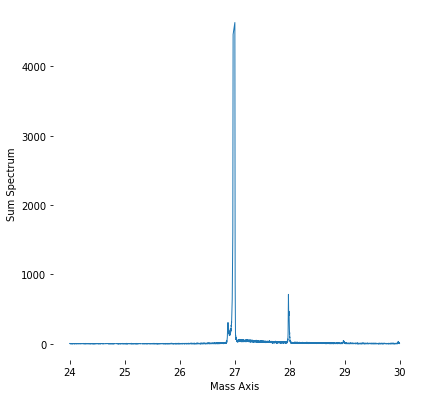

In [10]:
al.plot_sum_spectrum_vs_mass_axis(mass_min = 24, mass_max = 30,sum_spectrum_max=5000)
#al.plot_sum_spectrum_vs_mass_axis(mass_min = 24, mass_max = 30,sum_spectrum_max=5000).savefig("figure3.png")

### Quick overview of masses abundances as maximal projections over z axis

The function <b>max_proj_peak_data</b> allows you to visualise maximal projections along any axes:

    axes_displayed : axes to be displayed on each image (first/last : row/col)
    axis_parsed : axis used to generate individual plot
    axis_max_projection : axis that will be summed

Subplot represent individual m with sub plots row = y-axis, sub plots column = x-axis projected over z-axis
Projection shape: (100, 100, 250)


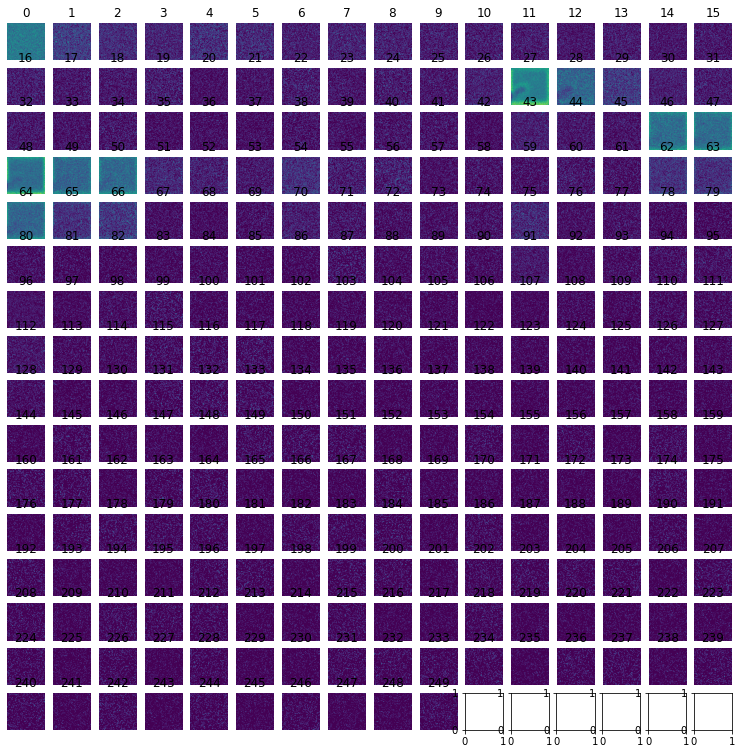

In [11]:
al.max_proj_peak_data( axes_displayed="xy", axis_parsed="m",axis_max_projection="z", figsize = (13,13),cmap = "viridis")

Subplot represent individual m with sub plots row = y-axis, sub plots column = x-axis projected over z-axis
Projection shape: (100, 100, 250)


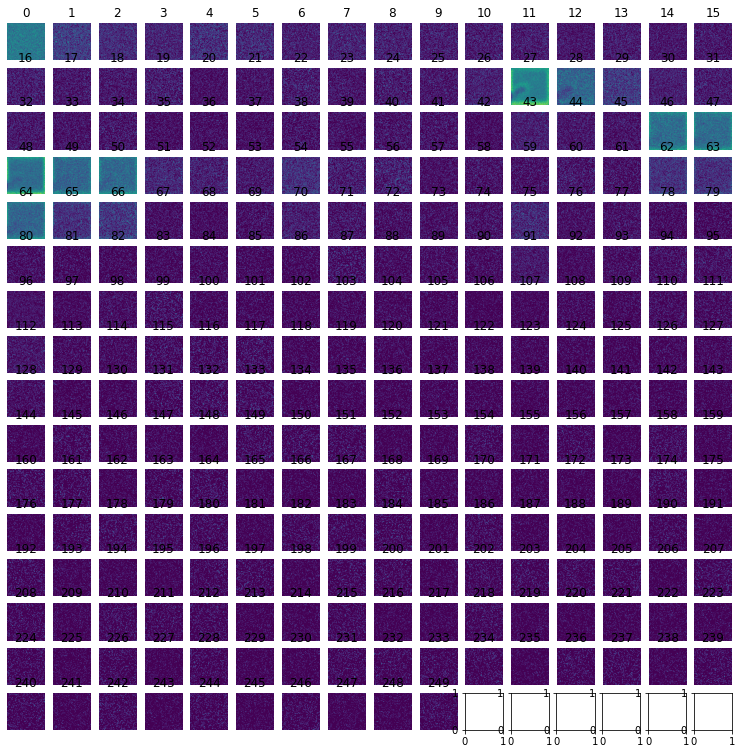

In [12]:
al.max_proj_peak_data( axes_displayed="xy", axis_parsed="m",axis_max_projection="z", figsize = (13,13))

Easily visualise mass abundance over any other axes (here over z axis)

Subplot represent individual n with sub plots row = z-axis, sub plots column = x-axis projected over y-axis
Projection shape: (100, 100, 250)


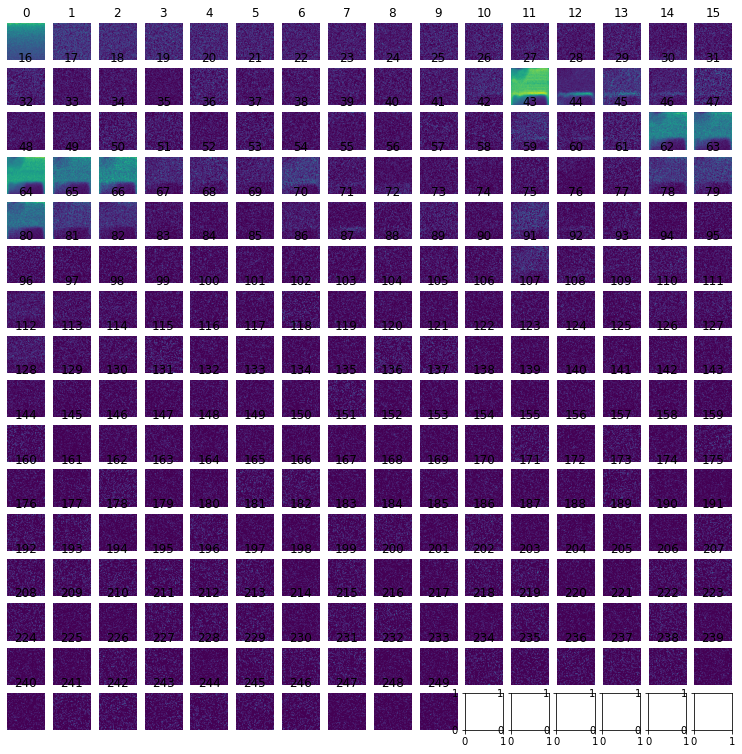

In [13]:
al.max_proj_peak_data(axes_displayed="xz", axis_parsed="n",axis_max_projection="y", figsize =(13,13) )

Confirms the higher abundance of mass 27 compared to other masses.

## Let's explore mass 27

Look at max projections for isotope 27 for all axes (z, y and x projections)

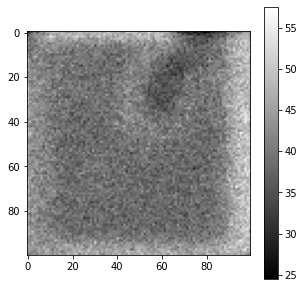

In [3]:
al.plot_max_proj_peak_data(mode = "z", mass = 27,cmap="gray",figsize =(5,5))
#al.plot_max_proj_peak_data(mode = "z", mass = 27,cmap="gray",figsize =(5,5)).savefig("figure5.png")

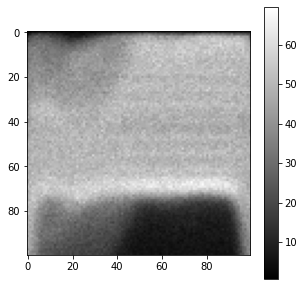

In [4]:
al.plot_max_proj_peak_data(mode = "y", mass = 27,cmap="gray")

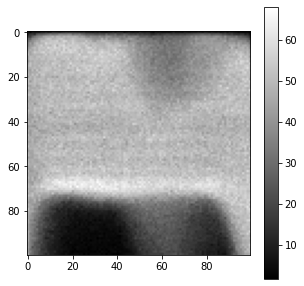

In [5]:
al.plot_max_proj_peak_data(mode = "x", mass = 27,cmap="gray")

Or to see all every maximal projections use <b>grid_proj_isotope</b>

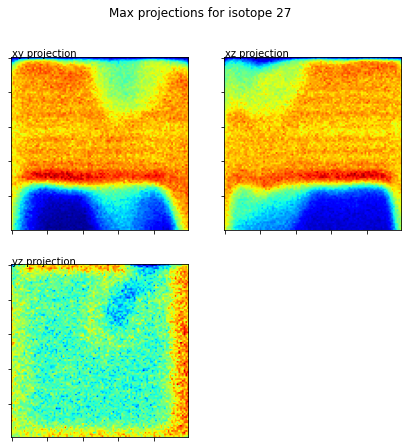

In [7]:
#Once a mass has been computed changing color/figsize is super fast (try changing isotope 27 to 28 then back to 27)
al.grid_proj_isotope(isotope=27,size = 7, cmap = "jet")
#al.grid_proj_isotope(isotope=27,size = 7, cmap = "jet").savefig("figure7.png")

### Looks good but what about plotting the abundance istead ?

Choose which axis to project onto and which masses.  Several masses can be plotted simultaneously.

Here we look at abundance of masses 27,28,48 along z axis:

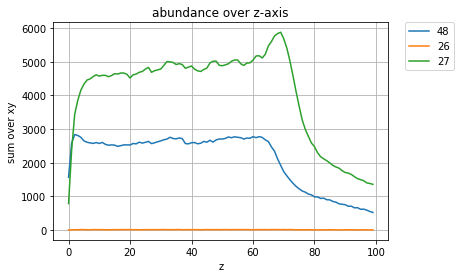

In [8]:
al.plot_abundance(projection_axis="z", mass= [26,27,48])
#al.plot_abundance(projection_axis="z", mass= [26,27,48]).savefig("figure8.png")

Look at abundance of masses 26,27,28 along y axis:

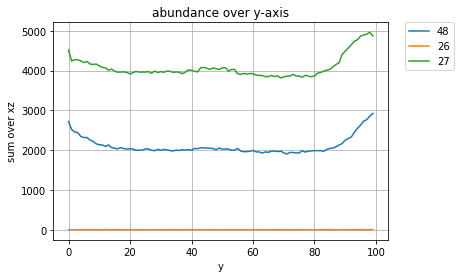

In [9]:
al.plot_abundance(projection_axis="y", mass= [26,27,48])

Look at abundance of masses 26,27,28 along x axis:

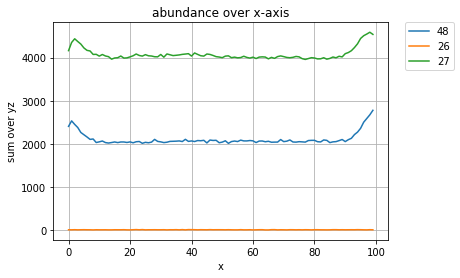

In [10]:
al.plot_abundance(projection_axis="x", mass= [26,27,48])

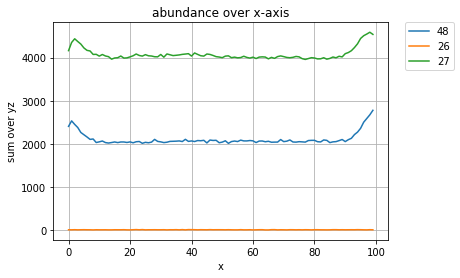

In [11]:
al.plot_abundance(projection_axis="x", mass= [26,27,48])

Let's overlay max projection for isotopes of masses 27 and 48 (can add more if needed) isotopes

aluminum 27 gray
cadmium 48 Blues


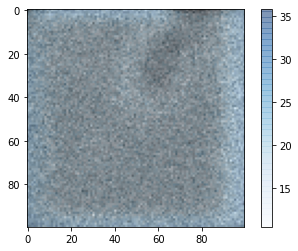

Wall time: 10.5 s


In [12]:
%%time
al.overlay_max_proj(alpha=0.3,aluminum = [27,"gray"], cadmium = [48,"Blues"])

# 3D plots

Scatterplot for one isotope, fast but not interactive

mass 27 threshold 1.2
mass 48 threshold 1.0
8095 points
         x     y     z     v
mass                        
27    3070  3070  3070  3070
48    5025  5025  5025  5025


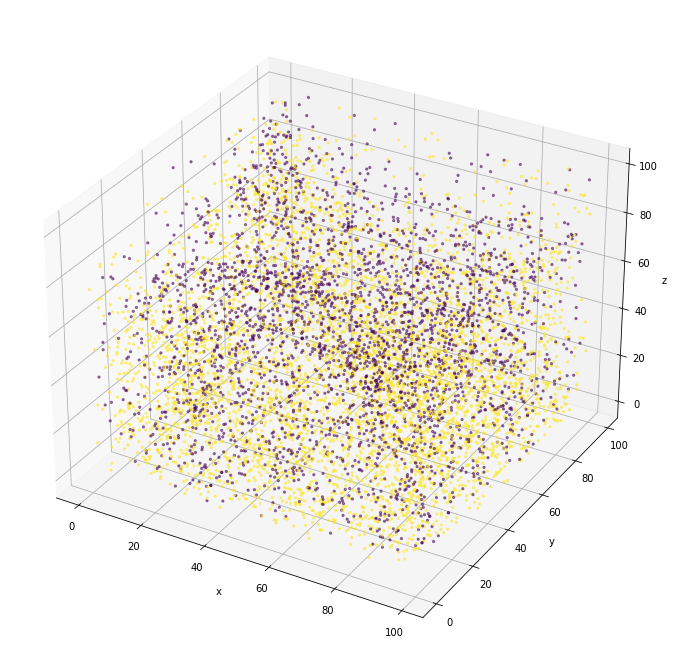

Wall time: 40.3 s


In [7]:
%%time
#al.convert_to_flat(al.peak_data,0.5,27)
al.three_D_plot_isotope(cmap = None , size = 5 , depthshade = True ,
                        opacity = 0.5 , mass_threshold = ((27,1.20),
                                                          (48,1.0),
                                                         ))

Interactive scatterplot (can be very slow with lots of points), can overlab multiple isotopes in 3D.

In [6]:
%%time
al.plot_3D_scatter_plotly(opacity=0.9,size = 2,mass_threshold = ((48, 1.0),
                                                          (27,1.2),
                                                         ))

mass 48 threshold 1.0
mass 27 threshold 1.2
8095 points
         x     y     z     v
mass                        
27    3070  3070  3070  3070
48    5025  5025  5025  5025


Wall time: 18.7 s
